In [1]:
import pyfits
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.cosmology import WMAP9 as cosmo
import matplotlib
import math
from scipy import ndimage
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage import iterate_structure
from scipy.ndimage.filters import maximum_filter
import scipy.optimize as opt
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from astropy.io import fits
import math
import photutils
import statmorph
from skimage import measure
from bresenham import bresenham
from photutils import CircularAperture,aperture_photometry
import cv2
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp



print('compiled')


compiled


/Users/beckynevin/Documents/Backup_My_Book/My_Passport_backup/Kinematics
myr, view 5 0


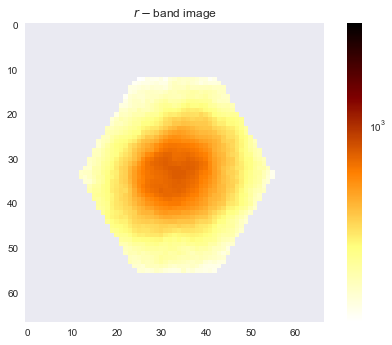

<Figure size 576x396 with 0 Axes>

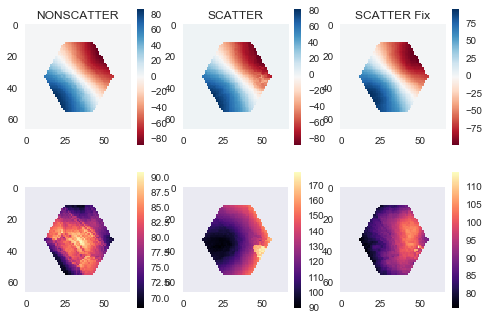

<Figure size 576x396 with 0 Axes>

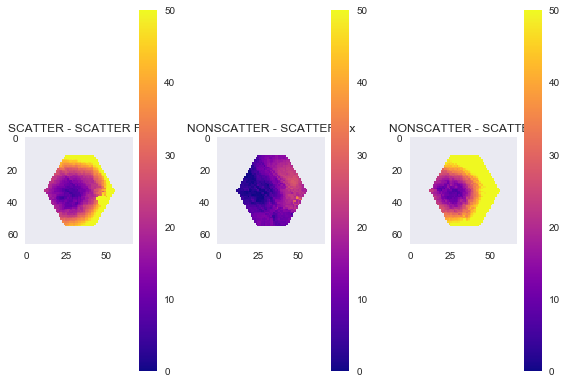

<Figure size 576x396 with 0 Axes>

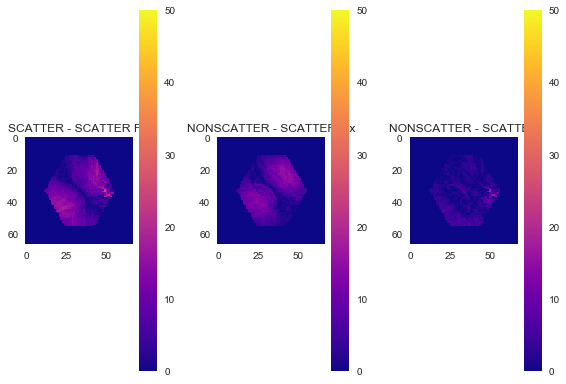

myr, view 5 1


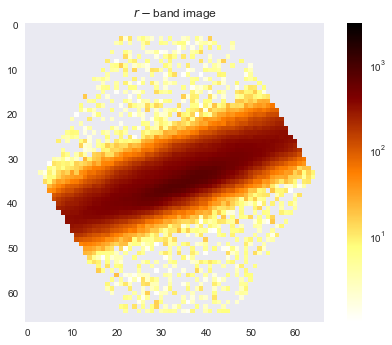

<Figure size 576x396 with 0 Axes>

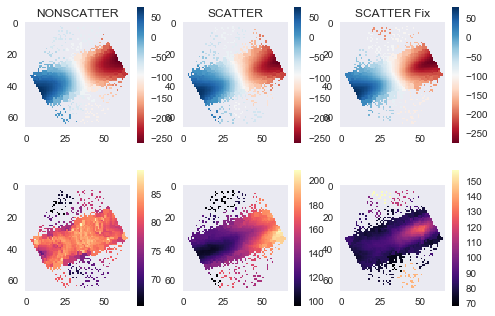

<Figure size 576x396 with 0 Axes>

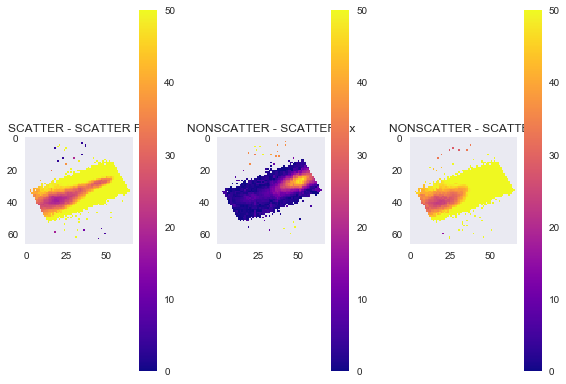

<Figure size 576x396 with 0 Axes>

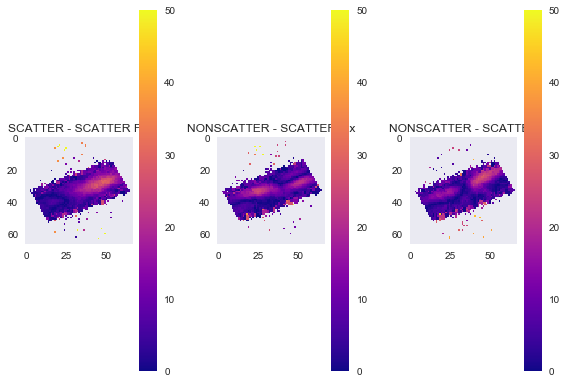

myr, view 5 2


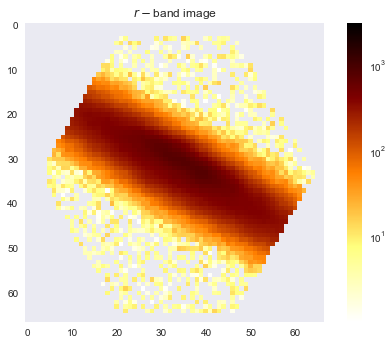

<Figure size 576x396 with 0 Axes>

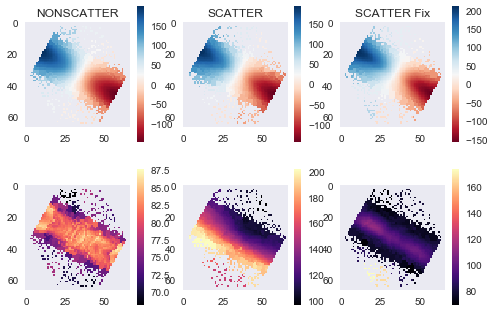

<Figure size 576x396 with 0 Axes>

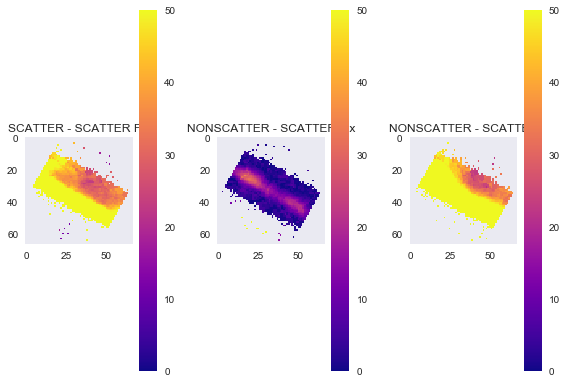

<Figure size 576x396 with 0 Axes>

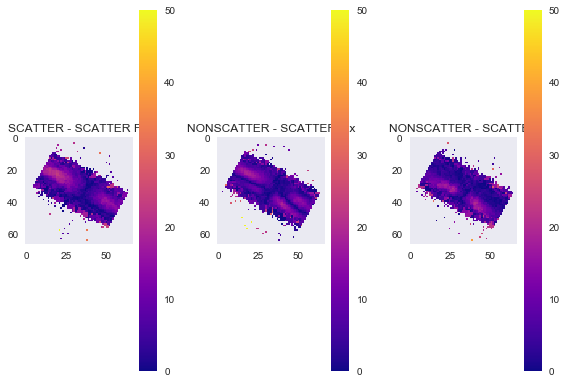

myr, view 5 3


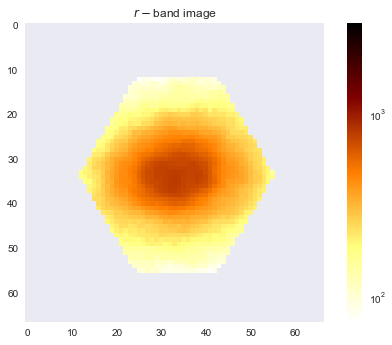

<Figure size 576x396 with 0 Axes>

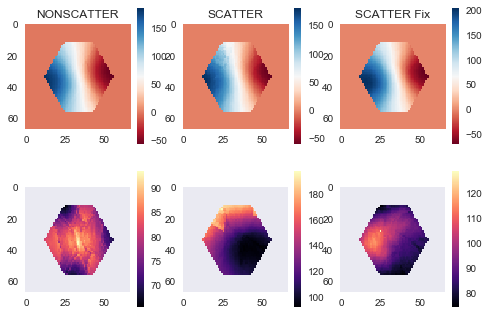

<Figure size 576x396 with 0 Axes>

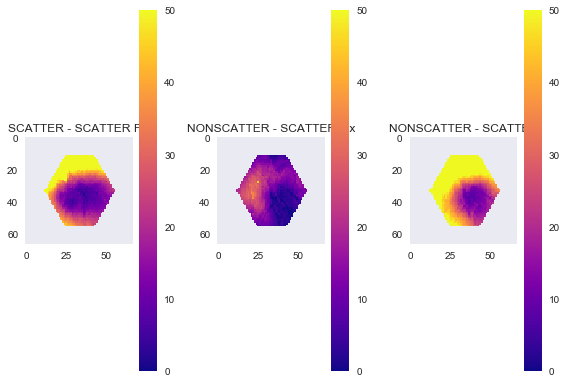

<Figure size 576x396 with 0 Axes>

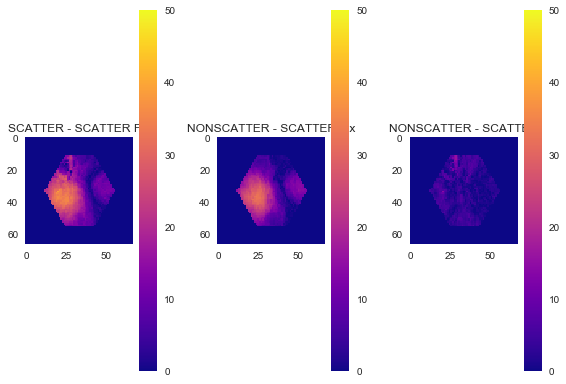

myr, view 5 4


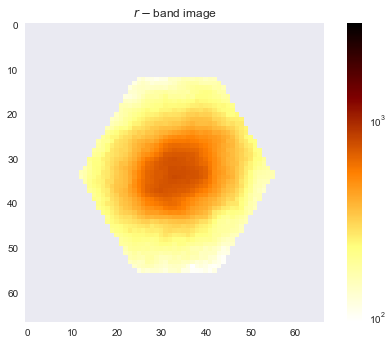

<Figure size 576x396 with 0 Axes>

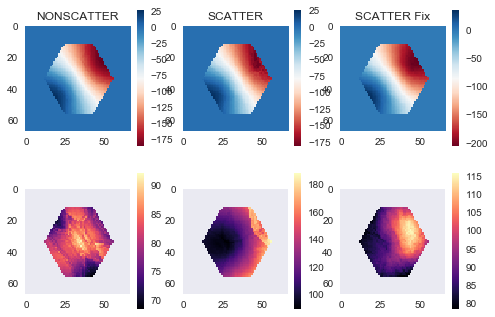

<Figure size 576x396 with 0 Axes>

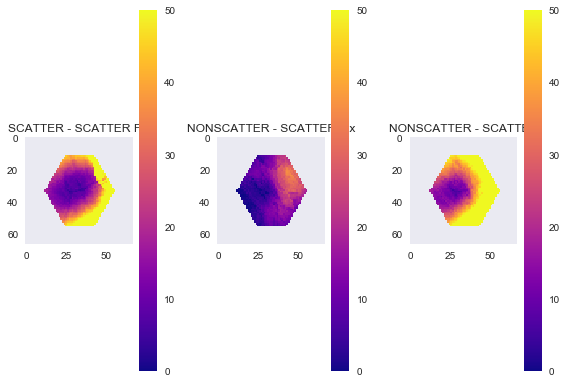

<Figure size 576x396 with 0 Axes>

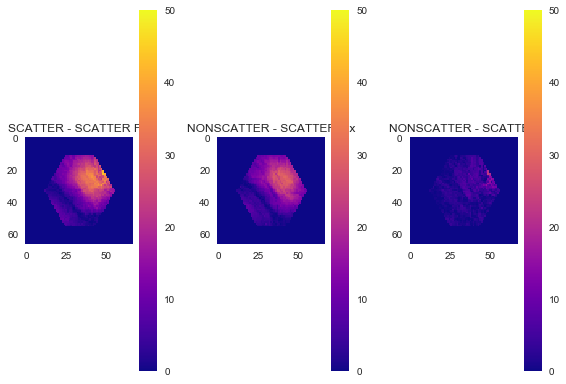

myr, view 5 5


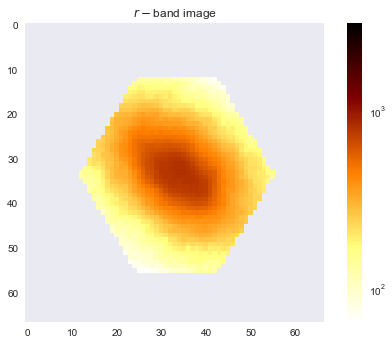

<Figure size 576x396 with 0 Axes>

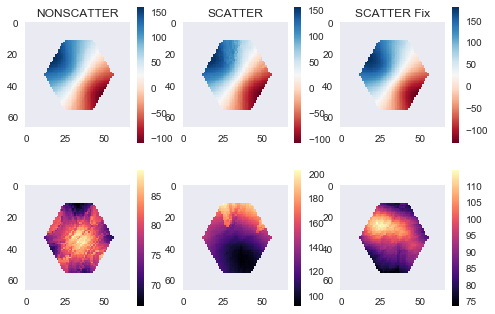

<Figure size 576x396 with 0 Axes>

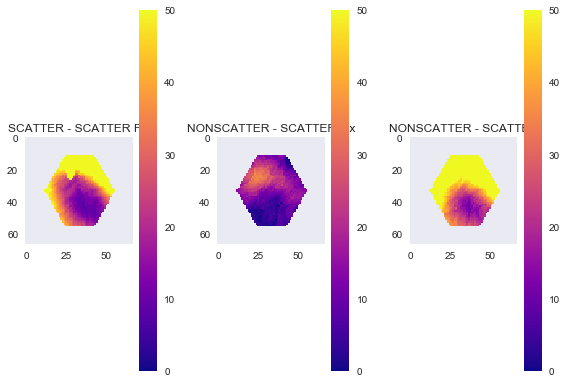

<Figure size 576x396 with 0 Axes>

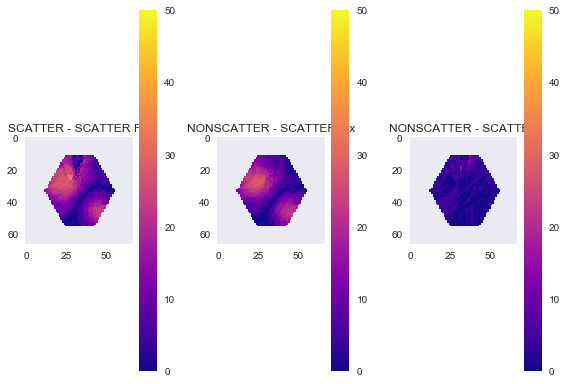

myr, view 5 6


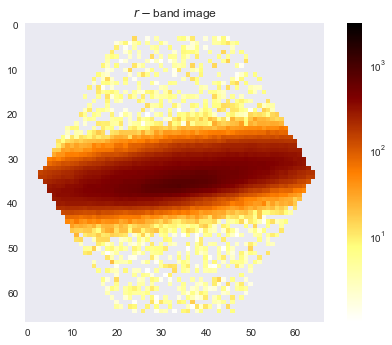

<Figure size 576x396 with 0 Axes>

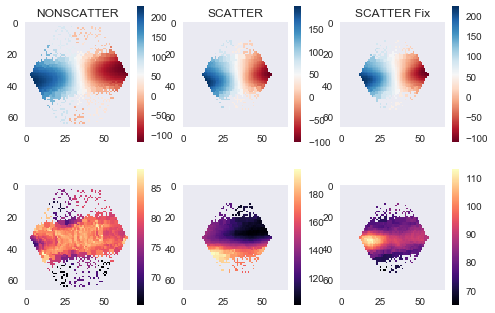

<Figure size 576x396 with 0 Axes>

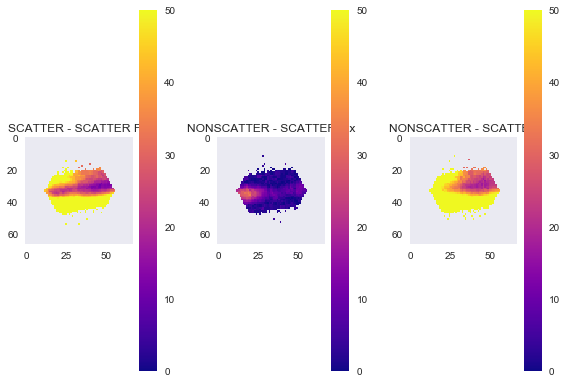

<Figure size 576x396 with 0 Axes>

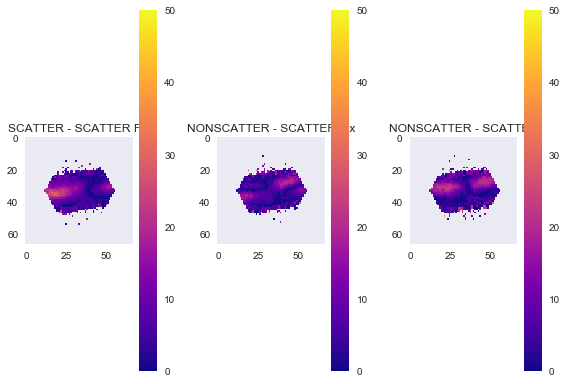

In [27]:
import os
print(os.getcwd())

os.chdir(os.path.expanduser('/Users/beckynevin/Documents/Backup_My_Book/My_Passport_backup/Kinematics/'))

import seaborn as sns
sns.set_style("dark")




myr_list=[5]#,60,240]#,10,20,30,40,50,60,100,200]
view_list=[0,1,2,3,4,5,6]

#view_list=[2]
#myr_list=[90]



adds='NONSCATTER_kin_correct_noise_conv'#stellar_kinematics_NONSCATTER_kin_correct_noi
adds_fix='SCATTER_kin_correct_noise_conv'
run='fg3_m12'
run_fix='fg3_m12_fixbug'#fixbug




plt.clf()
counter=0
z=0.03

for i in range(len(myr_list)):
    myr=myr_list[i]
    v_offsets=[]
    for j in range(len(view_list)):
        im=0
        view=view_list[j]
        print('myr, view', myr, view)
        if run=='fg3_m10':
            if myr > 420:
                im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_'+str(myr)+'.fits')
            else:
                if myr < 10:
                    im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_00'+str(myr)+'.fits')
                else:
                    if myr < 100:
                        im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_0'+str(myr)+'.fits')
                    else:
                        im = pyfits.open('../LAURA_Sims/q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_'+str(myr)+'.fits')
        
        
        if run=='fg3_m13':
            if myr > 140:
                im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_late/broadband_'+str(myr)+'.fits')
            else:
                if myr < 10:
                    im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_00'+str(myr)+'.fits')
                else:
                    if myr < 100:
                        im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_0'+str(myr)+'.fits')
                    else:
                        im = pyfits.open('../LAURA_Sims/q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_'+str(myr)+'.fits')
        
        if run=='fg3_m12_iso0.5':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m0.5_fg0.3/broadband_'+prefix+str(myr)+'.fits')
            
        
        if run=='fg3_m12_iso1':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m1_fg0.3/broadband_'+prefix+str(myr)+'.fits')
            
        if run=='fg3_m12':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            if myr < 170:
                im = pyfits.open('../LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_'+prefix+str(myr)+'.fits')
            else:
                im = pyfits.open('../LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband_'+prefix+str(myr)+'.fits')
        if run=='fg3_m12_agnx0':
            im = pyfits.open('../LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/agnx0/broadband_'+str(myr)+'.fits')
        
        if run=='fg3_m15_iso1':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/m1_fg0.3_BT0.2_allrx10_isolated_sunruns/broadband_'+prefix+str(myr)+'.fits')
        
        if run=='fg3_m15':
            if myr > 300:
                im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_'+str(myr)+'.fits')
            else:
                if myr < 10:
                    im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_00'+str(myr)+'.fits')
                else:
                    if myr < 100:
                        im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_0'+str(myr)+'.fits')
                    else:
                        im = pyfits.open('../LAURA_Sims/q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_'+str(myr)+'.fits')
        if run=='fg1_m13':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            if myr > 140:
                
                if myr <360:
                    im = pyfits.open('../LAURA_Sims/q0.333_fg0.1_allrx10_sunruns/hires_kin_late/broadband_sdss_z0.03_'+prefix+str(myr)+'.fits')
                else:
                    im = pyfits.open('../LAURA_Sims/q0.333_fg0.1_allrx10_sunruns/hires_kin_late/broadband_'+prefix+str(myr)+'.fits')
            
            else:
                im = pyfits.open('../LAURA_Sims/q0.333_fg0.1_allrx10_sunruns/hires_kin_early_cen1/broadband_'+prefix+str(myr)+'.fits')
            
        if run=='fg1_m13_iso1':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m1_fg0.1/broadband_'+prefix+str(myr)+'.fits')
        if run=='fg1_m13_iso0.333':
            if myr < 10:
                prefix='00'
            else:
                if myr < 100:
                    prefix='0'
                else:
                    prefix=''
            im = pyfits.open('../LAURA_Sims/isolated_galaxies/m0.333_fg0.1/broadband_'+prefix+str(myr)+'.fits')
            
        
        #try:
        #print(os.getcwd())
        try:
            kin_cube=pyfits.open('stellar_kinematics_'+str(adds)+'_'+str(run)+'_'+str(myr)+'_'+str(view)+'.fits')
            kin_cube_fix=pyfits.open('stellar_kinematics_'+str(adds_fix)+'_'+str(run_fix)+'_'+str(myr)+'_'+str(view)+'.fits')
            kin_cube_SCATTER=pyfits.open('stellar_kinematics_'+str(adds_fix)+'_'+str(run)+'_'+str(myr)+'_'+str(view)+'.fits')
        except FileNotFoundError:
            continue
          
        '''except FileNotFoundError:
            print('STELLAR velocity map not there yet', 'stellar_kinematics_'+str(adds)+'_'+str(run)+'_'+str(myr)+'_'+str(view)+'.fits')
            print(os.getcwd())
            continue'''
        
        dia = np.where(kin_cube[1].data != 0.0)
        dia_pix = (dia[1].max()-dia[1].min())#this is the number of pixels
        dia = dia_pix*0.5#because 0.5" per spaxel
        
        
        vel = ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)
        vel_e = ma.masked_where(kin_cube[2].data==0, kin_cube[2].data)
        sig = ma.masked_where(kin_cube[3].data==0, kin_cube[3].data)
        sig_e = ma.masked_where(kin_cube[4].data==0, kin_cube[4].data)
        r_band = kin_cube[5].data
        r_band = ma.masked_where(r_band>1e10, r_band)
        
        vel = ma.masked_where(abs(vel)>1000, vel)
        vel_e = ma.masked_where(abs(vel)>1000, vel_e)
        
        
        vel_fix = ma.masked_where(kin_cube_fix[1].data==0, kin_cube_fix[1].data)
        vel_e_fix = ma.masked_where(kin_cube_fix[2].data==0, kin_cube_fix[2].data)
        sig_fix = ma.masked_where(kin_cube_fix[3].data==0, kin_cube_fix[3].data)
        sig_e_fix = ma.masked_where(kin_cube_fix[4].data==0, kin_cube_fix[4].data)
        
        vel_fix = ma.masked_where(abs(vel_fix)>1000, vel_fix)
        vel_e_fix = ma.masked_where(abs(vel_fix)>1000, vel_e_fix)
        
        vel_SCATTER = ma.masked_where(kin_cube_SCATTER[1].data==0, kin_cube_SCATTER[1].data)
        vel_e_SCATTER = ma.masked_where(kin_cube_SCATTER[2].data==0, kin_cube_SCATTER[2].data)
        sig_SCATTER = ma.masked_where(kin_cube_SCATTER[3].data==0, kin_cube_SCATTER[3].data)
        sig_e_SCATTER = ma.masked_where(kin_cube_SCATTER[4].data==0, kin_cube_SCATTER[4].data)
        
        vel_SCATTER = ma.masked_where(abs(vel_SCATTER)>1000, vel_SCATTER)
        vel_e_SCATTER = ma.masked_where(abs(vel_SCATTER)>1000, vel_e_SCATTER)
        
        plt.clf()
        plt.title('$r-$band image')
        plt.imshow(r_band, cmap='afmhot_r', norm=matplotlib.colors.LogNorm(vmax=10**3.5))
        plt.colorbar()
        plt.show()
        
        plt.clf()
        fig=plt.figure()
        ax0 = fig.add_subplot(231)
        ax0.set_title('NONSCATTER')
        im0 = ax0.imshow(vel, cmap='RdBu')#, vmin=-150, vmax=50)
        plt.colorbar(im0)
        
        ax1 = fig.add_subplot(232)
        ax1.set_title('SCATTER')
        im1 = ax1.imshow(vel_SCATTER, cmap='RdBu')#, vmin=-150, vmax=50)
        plt.colorbar(im1)
        
        ax2 = fig.add_subplot(233)
        ax2.set_title('SCATTER Fix')
        im2 = ax2.imshow(vel_fix, cmap='RdBu')#, vmin=-150, vmax=50)
        plt.colorbar(im2)
        
        ax3 = fig.add_subplot(234)
        im3 = ax3.imshow(sig, cmap='magma')#, vmin=50, vmax=100)
        plt.colorbar(im3)
        
        ax4 = fig.add_subplot(235)
        im4 = ax4.imshow(sig_SCATTER, cmap='magma')#, vmin=100, vmax=150)
        plt.colorbar(im4)
        
        ax5 = fig.add_subplot(236)
        im5 = ax5.imshow(sig_fix, cmap='magma')#, vmin=50, vmax=100)
        plt.colorbar(im5)
        plt.show()
        
        
        '''Showcasing the difference between each map'''
        
        plt.clf()
        fig = plt.figure()
        ax0 = fig.add_subplot(131)
        ax0.set_title('SCATTER - SCATTER Fix')
        im0 = ax0.imshow(abs(sig_SCATTER-sig_fix), cmap='plasma', vmin=0, vmax=50)
        plt.colorbar(im0)
        
        ax1 = fig.add_subplot(132)
        ax1.set_title('NONSCATTER - SCATTER Fix')
        im1 = ax1.imshow(abs(sig - sig_fix), cmap='plasma', vmin=0, vmax=50)
        plt.colorbar(im1)
        
        ax2 = fig.add_subplot(133)
        ax2.set_title('NONSCATTER - SCATTER')
        im2 = ax2.imshow(abs(sig - sig_SCATTER), cmap='plasma', vmin=0, vmax=50)
        plt.colorbar(im2)
        plt.tight_layout()
        plt.show()
        
        plt.clf()
        fig = plt.figure()
        ax0 = fig.add_subplot(131)
        ax0.set_title('SCATTER - SCATTER Fix')
        im0 = ax0.imshow(abs(vel_SCATTER-vel_fix), cmap='plasma', vmin=0, vmax=50)
        plt.colorbar(im0)
        
        ax1 = fig.add_subplot(132)
        ax1.set_title('NONSCATTER - SCATTER Fix')
        im1 = ax1.imshow(abs(vel - vel_fix), cmap='plasma', vmin=0, vmax=50)
        plt.colorbar(im1)
        
        ax2 = fig.add_subplot(133)
        ax2.set_title('NONSCATTER - SCATTER')
        im2 = ax2.imshow(abs(vel - vel_SCATTER), cmap='plasma', vmin=0, vmax=50)
        plt.colorbar(im2)
        plt.tight_layout()
        plt.show()
        
        
        
        
        

<Figure size 576x396 with 0 Axes>

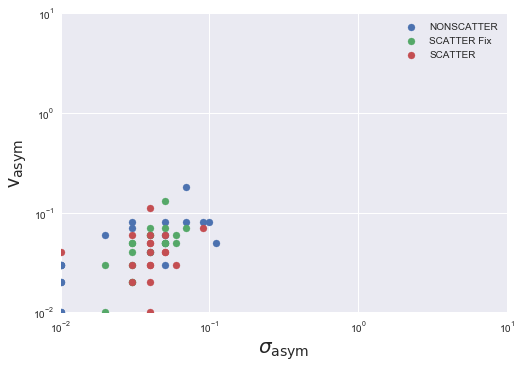

<Figure size 576x396 with 0 Axes>

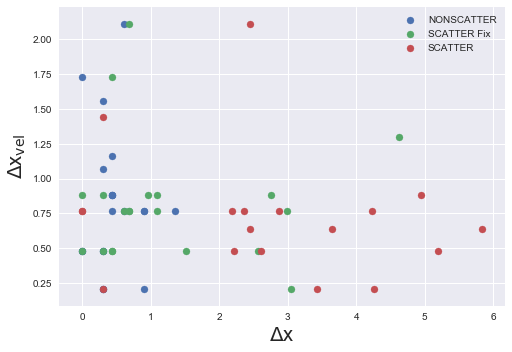

TypeError: only integer scalar arrays can be converted to a scalar index

In [17]:
'''
This is for comparing the LDA runs
'''

run_fix='fg3_m12_fixbug'
run='fg3_m12_notfixbug'

file_SCATTER='LDA_kin_rerecenter_'+str(run_fix)+'.txt'

with open(file_SCATTER, 'r') as f:
    data = f.readlines()

    myr=[]
    view=[]
    DPA=[]
    v_asym=[]
    s_asym=[]
    resids=[]
    lambda_r=[]
    epsilon=[]
    A=[]
    A_2=[]
    deltapos=[]
    deltapos2=[]


    for line in data:
        words = line.split()
        
        if words[0]=='Counter':
            continue
        else:
            
            myr.append(float(words[3]))
            view.append(float(words[4]))
            DPA.append(float(words[5]))
            v_asym.append(float(words[6]))
            s_asym.append(float(words[7]))
            resids.append(float(words[8]))
            lambda_r.append(float(words[9]))
            epsilon.append(float(words[10]))
            A.append(float(words[11]))
            A_2.append(float(words[12]))
            deltapos.append(float(words[13]))
            deltapos2.append(float(words[14]))
            
file_NONSCATTER='LDA_kin_rerecenter_'+str(run)+'.txt'

with open(file_NONSCATTER, 'r') as f:
    data = f.readlines()

    NON_myr=[]
    NON_view=[]
    NON_DPA=[]
    NON_v_asym=[]
    NON_s_asym=[]
    NON_resids=[]
    NON_lambda_r=[]
    NON_epsilon=[]
    NON_A=[]
    NON_A_2=[]
    NON_deltapos=[]
    NON_deltapos2=[]


    for line in data:
        words = line.split()
        
        if words[0]=='Counter':
            continue
        else:
            
            NON_myr.append(float(words[3]))
            NON_view.append(float(words[4]))
            NON_DPA.append(float(words[5]))
            NON_v_asym.append(float(words[6]))
            NON_s_asym.append(float(words[7]))
            NON_resids.append(float(words[8]))
            NON_lambda_r.append(float(words[9]))
            NON_epsilon.append(float(words[10]))
            NON_A.append(float(words[11]))
            NON_A_2.append(float(words[12]))
            NON_deltapos.append(float(words[13]))
            NON_deltapos2.append(float(words[14]))
            
file_SCATTER_old='LDA_kin_rerecenter_SCATTER_fg3_m12.txt'

with open(file_SCATTER_old, 'r') as f:
    data = f.readlines()

    old_myr=[]
    old_view=[]
    old_DPA=[]
    old_v_asym=[]
    old_s_asym=[]
    old_resids=[]
    old_lambda_r=[]
    old_epsilon=[]
    old_A=[]
    old_A_2=[]
    old_deltapos=[]
    old_deltapos2=[]


    for line in data:
        words = line.split()
        
        if words[0]=='Counter':
            continue
        else:
            
            old_myr.append(float(words[3]))
            old_view.append(float(words[4]))
            old_DPA.append(float(words[5]))
            old_v_asym.append(float(words[6]))
            old_s_asym.append(float(words[7]))
            old_resids.append(float(words[8]))
            old_lambda_r.append(float(words[9]))
            old_epsilon.append(float(words[10]))
            old_A.append(float(words[11]))
            old_A_2.append(float(words[12]))
            old_deltapos.append(float(words[13]))
            old_deltapos2.append(float(words[14]))
            

sns.set(color_codes=True)            
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(NON_s_asym,NON_v_asym, label='NONSCATTER')
ax1.scatter(s_asym,v_asym, label='SCATTER Fix')
ax1.scatter(old_s_asym,old_v_asym, label='SCATTER')

plt.legend()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim([0.01,10])#[max(m20_means),min(m20_means)])
ax1.set_ylim([0.01,10])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel('$\sigma_{\mathrm{asym}}$', size=20)
ax1.set_ylabel(r'v$_{\mathrm{asym}}$', size=20)
plt.show()


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(NON_deltapos,NON_deltapos2, label='NONSCATTER')
ax1.scatter(deltapos,deltapos2, label='SCATTER Fix')
ax1.scatter(old_deltapos,old_deltapos2, label='SCATTER')
plt.legend()
ax1.set_xlabel('$\Delta$x', size=20)
ax1.set_ylabel(r'$\Delta$x$_{\mathrm{vel}}$', size=20)
plt.show()



plt.clf()
sns.jointplot(x=DPA, y=NON_DPA, kind="hex")
plt.show()

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

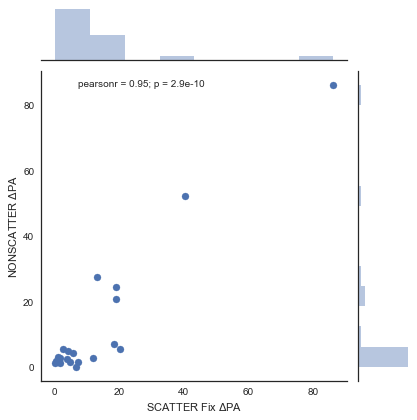

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


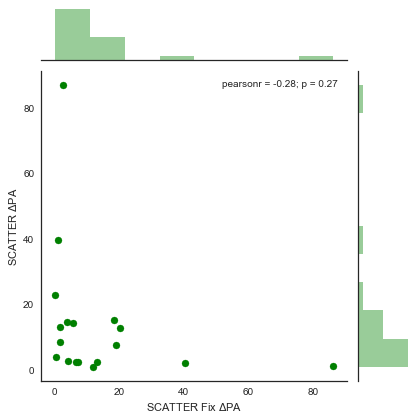

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

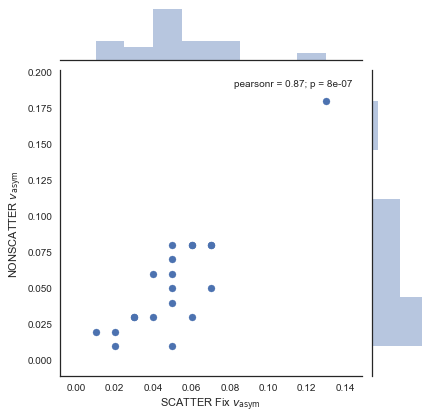

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


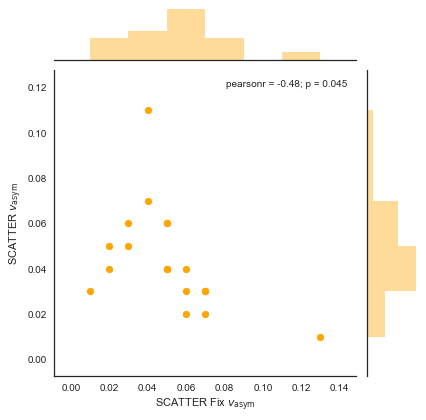

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

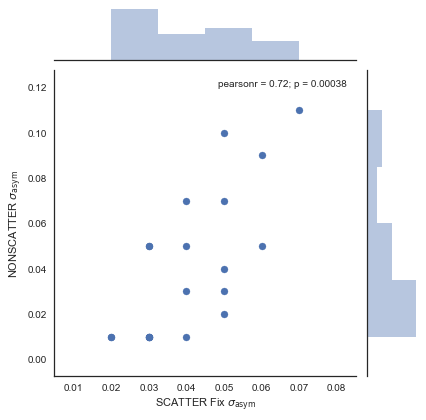

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


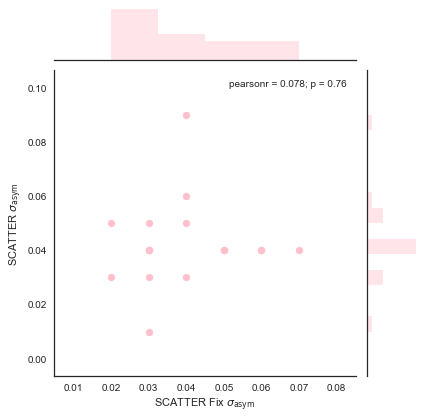

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

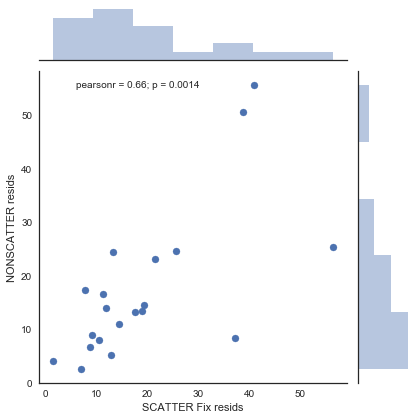

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


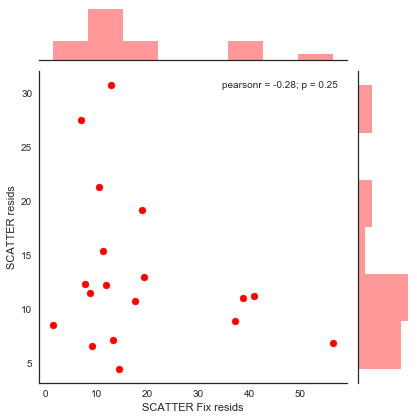

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

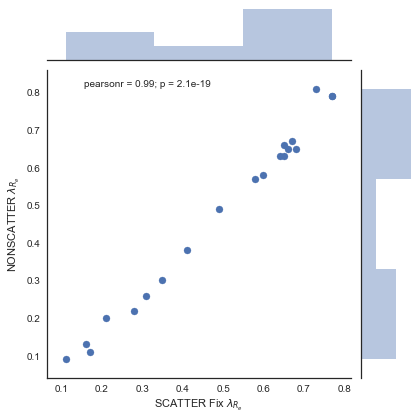

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


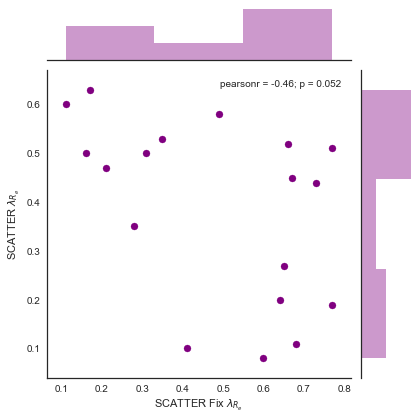

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

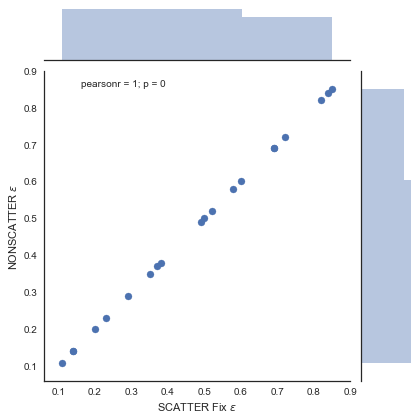

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


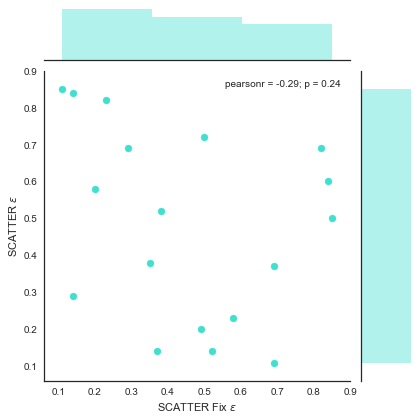

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

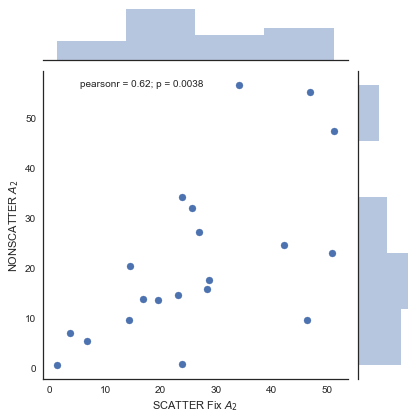

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


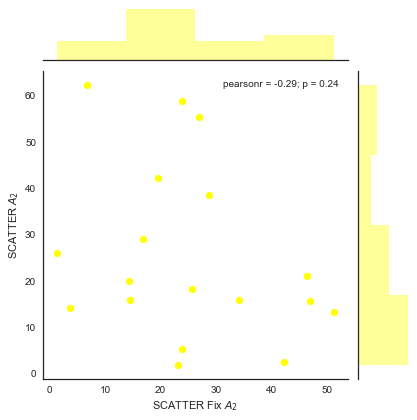

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


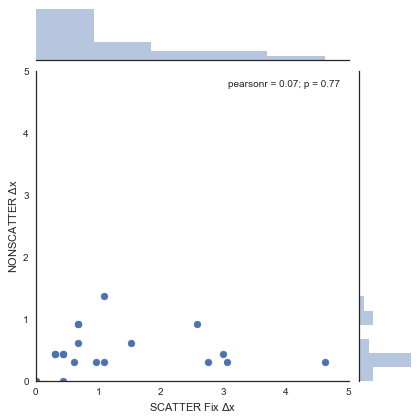

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


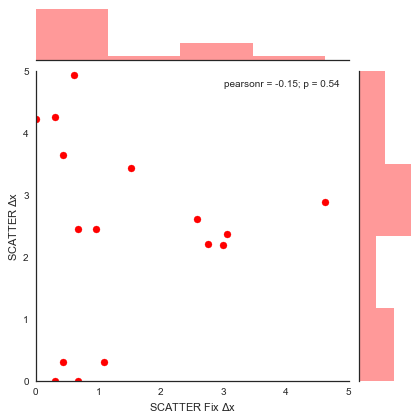

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x396 with 0 Axes>

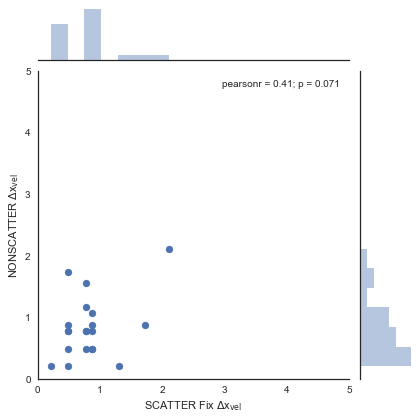

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


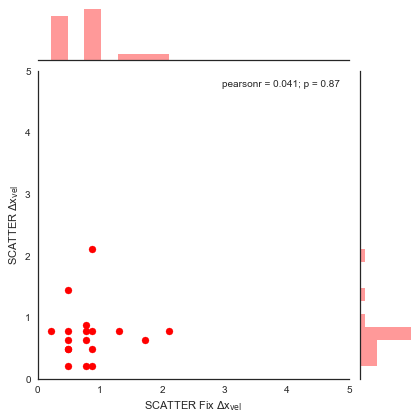

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
plt.clf()

DPA_s = pd.Series(DPA, name="SCATTER Fix $\Delta$PA")
NON_DPA_s = pd.Series(NON_DPA, name="NONSCATTER $\Delta$PA")
old_DPA_s = pd.Series(old_DPA, name="SCATTER $\Delta$PA")


g=sns.jointplot(DPA_s,NON_DPA_s)

plt.show()

g=sns.jointplot(DPA_s,old_DPA_s, color='green')
plt.show()

plt.clf()

v_asym_s = pd.Series(v_asym, name="SCATTER Fix $v_{\mathrm{asym}}$")
NON_v_asym_s = pd.Series(NON_v_asym, name="NONSCATTER $v_{\mathrm{asym}}$")
old_v_asym_s = pd.Series(old_v_asym, name="SCATTER $v_{\mathrm{asym}}$")

g=sns.jointplot(v_asym_s,NON_v_asym_s)
plt.show()

g=sns.jointplot(v_asym_s,old_v_asym_s, color='orange')
plt.show()



plt.clf()

s_asym_s = pd.Series(s_asym, name="SCATTER Fix $\sigma_{\mathrm{asym}}$")
NON_s_asym_s = pd.Series(NON_s_asym, name="NONSCATTER $\sigma_{\mathrm{asym}}$")
old_s_asym_s = pd.Series(old_s_asym, name="SCATTER $\sigma_{\mathrm{asym}}$")

g=sns.jointplot(s_asym_s,NON_s_asym_s)
plt.show()
g=sns.jointplot(s_asym_s,old_s_asym_s, color='pink')
plt.show()

plt.clf()

resids_s = pd.Series(resids, name="SCATTER Fix resids")
NON_resids_s = pd.Series(NON_resids, name="NONSCATTER resids")
old_resids_s = pd.Series(old_resids, name="SCATTER resids")

g=sns.jointplot(resids_s,NON_resids_s)
plt.show()
g=sns.jointplot(resids_s,old_resids_s, color='red')
plt.show()

plt.clf()

lambda_r_s = pd.Series(lambda_r, name="SCATTER Fix $\lambda_{R_e}$")
NON_lambda_r_s = pd.Series(NON_lambda_r, name="NONSCATTER $\lambda_{R_e}$")
old_lambda_r_s = pd.Series(old_lambda_r, name="SCATTER $\lambda_{R_e}$")

g=sns.jointplot(lambda_r_s,NON_lambda_r_s)
plt.show()
g=sns.jointplot(lambda_r_s,old_lambda_r_s, color='purple')
plt.show()

plt.clf()

epsilon_s = pd.Series(epsilon, name="SCATTER Fix $\epsilon$")
NON_epsilon_s = pd.Series(NON_epsilon, name="NONSCATTER $\epsilon$")
old_epsilon_s = pd.Series(old_epsilon, name="SCATTER $\epsilon$")

g=sns.jointplot(epsilon_s,NON_epsilon_s)
plt.show()
g=sns.jointplot(epsilon_s,old_epsilon_s, color='turquoise')
plt.show()

plt.clf()



plt.clf()

A_2_s = pd.Series(A_2, name="SCATTER Fix $A_2$")
NON_A_2_s = pd.Series(NON_A_2, name="NONSCATTER $A_2$")
old_A_2_s = pd.Series(old_A_2, name="SCATTER $A_2$")

g=sns.jointplot(A_2_s,NON_A_2_s)
plt.show()
g=sns.jointplot(A_2_s,old_A_2_s, color='yellow')
plt.show()


deltapos_s = pd.Series(deltapos, name="SCATTER Fix $\Delta$x")
NON_deltapos_s = pd.Series(NON_deltapos, name="NONSCATTER $\Delta$x")
old_deltapos_s = pd.Series(old_deltapos, name="SCATTER $\Delta$x")

g=sns.jointplot(deltapos_s,NON_deltapos_s,xlim=[0,5], ylim=[0,5])
plt.show()
g=sns.jointplot(deltapos_s,old_deltapos_s,xlim=[0,5], ylim=[0,5], color='red')
plt.show()

plt.clf()

deltapos2_s = pd.Series(deltapos2, name="SCATTER Fix $\Delta$x$_{\mathrm{vel}}$")
NON_deltapos2_s = pd.Series(NON_deltapos2, name="NONSCATTER $\Delta$x$_{\mathrm{vel}}$")
old_deltapos2_s = pd.Series(old_deltapos2, name="SCATTER $\Delta$x$_{\mathrm{vel}}$")

g=sns.jointplot(deltapos2_s,NON_deltapos2_s,xlim=[0,5], ylim=[0,5])
plt.show()


g=sns.jointplot(deltapos2_s,old_deltapos2_s,xlim=[0,5], ylim=[0,5], color='red')
plt.show()



In [23]:
'''
Time to compare the mean values for different myrs
'''

print('$\Delta$x')
deltapos_SCATTER_non=[]
deltapos_SCATTER=[]
for j in range(len(myr)):
    if myr[j]==0.05:
        deltapos_SCATTER_non.append(deltapos[j])
    else:
        deltapos_SCATTER.append(deltapos[j])
        
print('mean SCATTER Fix non', np.mean(deltapos_SCATTER_non))
print('mean SCATTER Fix merg', np.mean(deltapos_SCATTER))

deltapos_NONSCATTER_non=[]
deltapos_NONSCATTER=[]
for j in range(len(NON_myr)):
    if NON_myr[j]==0.05:
        deltapos_NONSCATTER_non.append(NON_deltapos[j])
    else:
        deltapos_NONSCATTER.append(NON_deltapos[j])
        
print('mean NONSCATTER non', np.mean(deltapos_NONSCATTER_non))
print('mean NONSCATTER merg', np.mean(deltapos_NONSCATTER))

print('~~~~~~')
print('$A_2$')
A_2_SCATTER_non=[]
A_2_SCATTER=[]
for j in range(len(myr)):
    if myr[j]==0.05:
        A_2_SCATTER_non.append(A_2[j])
    else:
        A_2_SCATTER.append(A_2[j])
        
print('mean SCATTER Fix non', np.mean(A_2_SCATTER_non))
print('mean SCATTER Fix merg', np.mean(A_2_SCATTER))

A_2_NONSCATTER_non=[]
A_2_NONSCATTER=[]
for j in range(len(NON_myr)):
    if NON_myr[j]==0.05:
        A_2_NONSCATTER_non.append(NON_A_2[j])
    else:
        A_2_NONSCATTER.append(NON_A_2[j])
        
print('mean NONSCATTER non', np.mean(A_2_NONSCATTER_non))
print('mean NONSCATTER merg', np.mean(A_2_NONSCATTER))

A_2_old_non=[]
A_2_old=[]
for j in range(len(old_myr)):
    if myr[j]==0.05:
        A_2_old_non.append(old_A_2[j])
    else:
        A_2_old.append(old_A_2[j])
        
print('mean SCATTER non', np.mean(A_2_old_non))
print('mean SCATTER merg', np.mean(A_2_old))




$\Delta$x
mean SCATTER Fix non 2.6371428571428575
mean SCATTER Fix merg 0.5169230769230768
mean NONSCATTER non 0.45
mean NONSCATTER merg 0.47000000000000003
~~~~~~
$A_2$
mean SCATTER Fix non 13.444285714285714
mean SCATTER Fix merg 33.47230769230769
mean NONSCATTER non 9.335714285714285
mean NONSCATTER merg 27.886153846153846
mean SCATTER non 21.73857142857143
mean SCATTER merg 27.579090909090908


<class 'numpy.ndarray'> (500,)
<class 'pandas.core.series.Series'> (500,)


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'height'
  s)


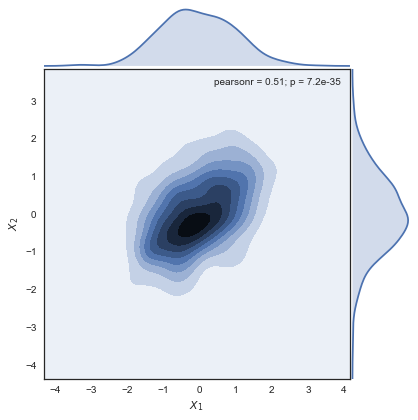

In [44]:


# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
print(type(x1),np.shape(x1))
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")
print(type(x1),np.shape(x1))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)
plt.show()